In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Home.csv')
print(data.to_string())
a = 0.0
b = 0.0
learning = 0.001

    room_number  price
0             2    150
1             3    200
2             2    175
3             4    350
4             3    275
5             2    225
6             5    500
7             4    425
8             3    325
9             2    250
10            4    400
11            3    300
12            3    275
13            2    200
14            4    375
15            3    280
16            5    550
17            4    450
18            3    320
19            2    225
20            3    190
21            2    175
22            4    340
23            3    250
24            2    200
25            5    480
26            4    400
27            3    310
28            2    235
29            4    370
30            3    285
31            3    255
32            2    195
33            4    385
34            3    290
35            5    525
36            4    425
37            3    310
38            2    220
39            3    190
40            2    175
41            4    350
42         

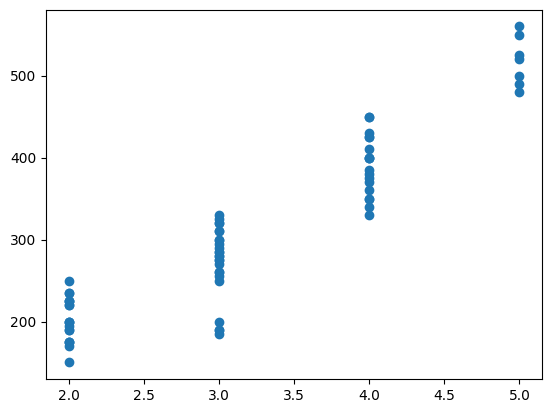

In [17]:
plt.scatter(data['room_number'],data['price'])
plt.show()

In [18]:
def mse(points , a , b):
    sum_error = 0
    for i in range(len(points)):
        x = points.iloc[i].room_number
        y = points.iloc[i].price
        sum_error += (y-(a*x+b)) ** 2
        error = sum_error / float(len(points))
    return error

In [19]:
def Gd(points , learning_rate , a_old , b_old):
    a_gd = 0
    b_gd = 0
    for i in range(len(points)):
        x = points.iloc[i].room_number
        y = points.iloc[i].price
        a_gd +=(-2/len(points)) * x * (y-(a_old*x+b_old))
        b_gd +=(-2/len(points)) * (y-(a_old*x+b_old))

    a_new = a_old - (a_gd * learning_rate)
    b_new = b_old - (b_gd * learning_rate)
    return a_new , b_new
    

Iteration:0, error:101705.25, a:2.16, b:0.62
Iteration:10, error:63189.43, a:21.09, b:6.04
Iteration:20, error:39492.41, a:35.95, b:10.28
Iteration:30, error:24912.64, a:47.61, b:13.59
Iteration:40, error:15942.27, a:56.76, b:16.17
Iteration:50, error:10423.08, a:63.94, b:18.18
Iteration:60, error:7027.22, a:69.57, b:19.74
Iteration:70, error:4937.75, a:74.00, b:20.96
Iteration:80, error:3652.03, a:77.47, b:21.89
Iteration:90, error:2860.82, a:80.20, b:22.62
Iteration:100, error:2373.86, a:82.34, b:23.17
Iteration:110, error:2074.09, a:84.03, b:23.59
Iteration:120, error:1889.49, a:85.36, b:23.90
Iteration:130, error:1775.74, a:86.40, b:24.14
Iteration:140, error:1705.59, a:87.23, b:24.31
Iteration:150, error:1662.26, a:87.88, b:24.43
Iteration:160, error:1635.43, a:88.39, b:24.51
Iteration:170, error:1618.76, a:88.80, b:24.56
Iteration:180, error:1608.34, a:89.12, b:24.58
Iteration:190, error:1601.76, a:89.38, b:24.59
Iteration:200, error:1597.55, a:89.58, b:24.58
Iteration:210, error

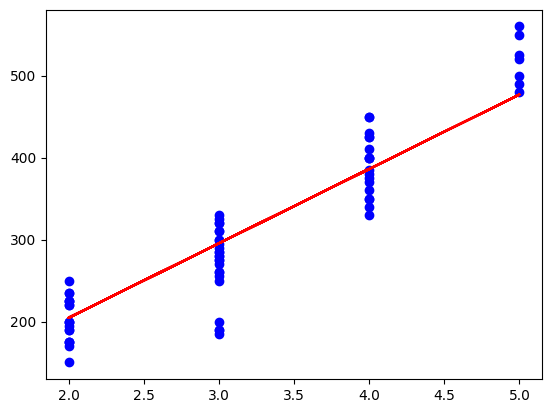

In [20]:
for i in range(500):
    a, b = Gd(data, learning, a, b)
    error = mse(data, a, b)
    if i % 10 == 0:
        print(f"Iteration:{i}, error:{error:.2f}, a:{a:.2f}, b:{b:.2f}")
plt.scatter(data['room_number'], data['price'] , color = "blue")
plt.plot(data['room_number'], [a*x+b for x in data['room_number']], color="red")
plt.show()